<a href="https://colab.research.google.com/github/aekgmla77/2024-2-DeepLearning/blob/main/LSTM_%EC%A3%BC%EA%B0%80_%EC%98%88%EC%B8%A1_20240926.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf

In [15]:
df = yf.download('NVDA', start='2020-09-24', end='2024-09-24')

[*********************100%***********************]  1 of 1 completed


In [16]:
data = df.filter(['Close'])
dataset = data.values
LOOKBACK = 60
training_data_len = math.ceil(len(dataset) * 0.8)

Text(0, 0.5, 'close price')

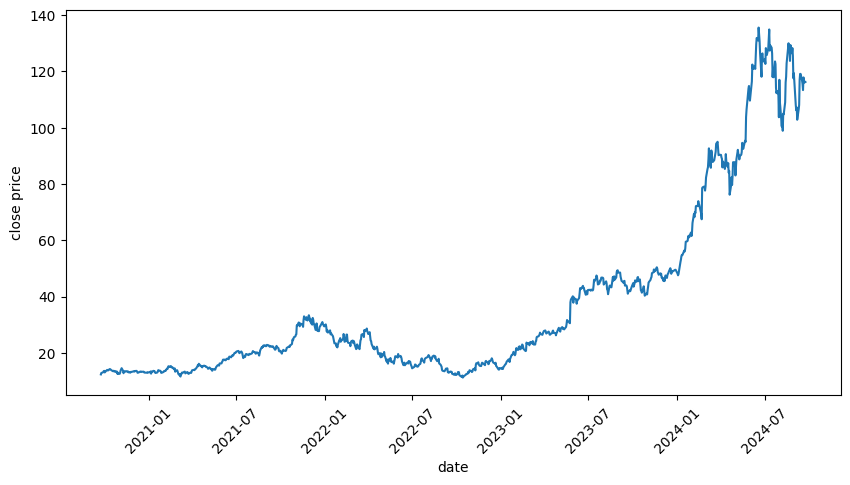

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = plt.plot(df['Close'])
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('close price')

In [18]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [19]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(LOOKBACK, training_data_len):
    x_train.append(train_data[i - LOOKBACK:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


744/744 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.1800e-04
Epoch 2/3
744/744 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.4235e-04
Epoch 3/3
744/744 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.6754e-04


In [21]:
test_data = scaled_data[training_data_len - LOOKBACK:, :]
test_data_len = len(test_data)

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(LOOKBACK, test_data_len):
    x_test.append(test_data[i - LOOKBACK:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [22]:
rmse = np.sqrt(np.mean(prediction - y_test) ** 2)
print(f"RMSE {rmse}")

RMSE 1.4127584239143638


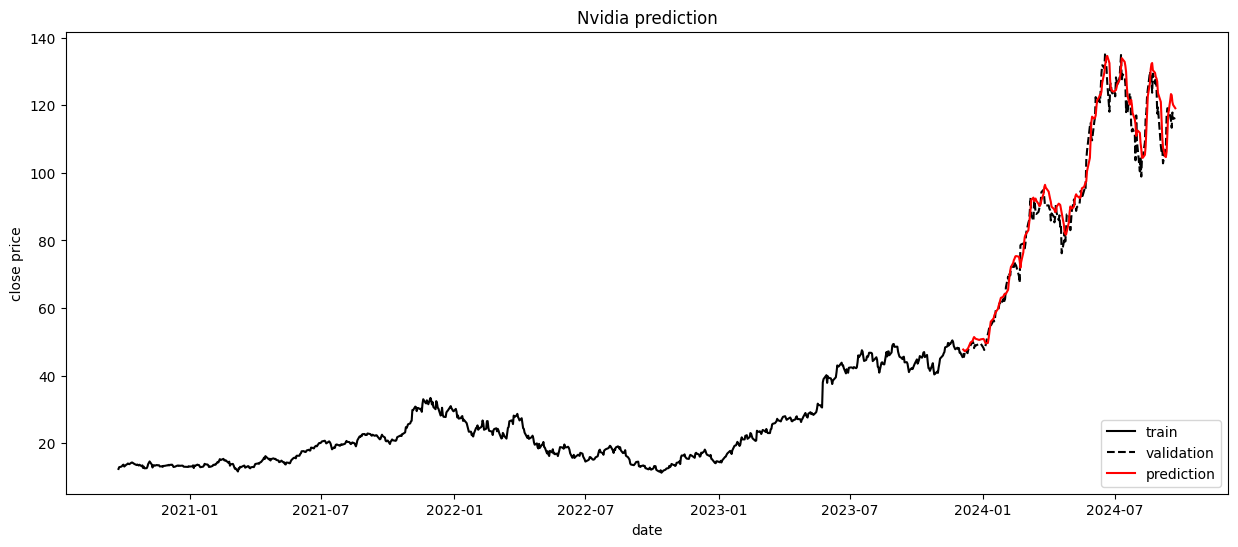

In [23]:
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['prediction'] = prediction

plt.figure(figsize=(15, 6))
plt.title('Nvidia prediction')
plt.xlabel('date')
plt.ylabel('close price')
plt.plot(train['Close'], color='black')
plt.plot(valid['Close'], color='black', linestyle='dashed')
plt.plot(valid['prediction'], color='r')

plt.legend(['train', 'validation', 'prediction'], loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

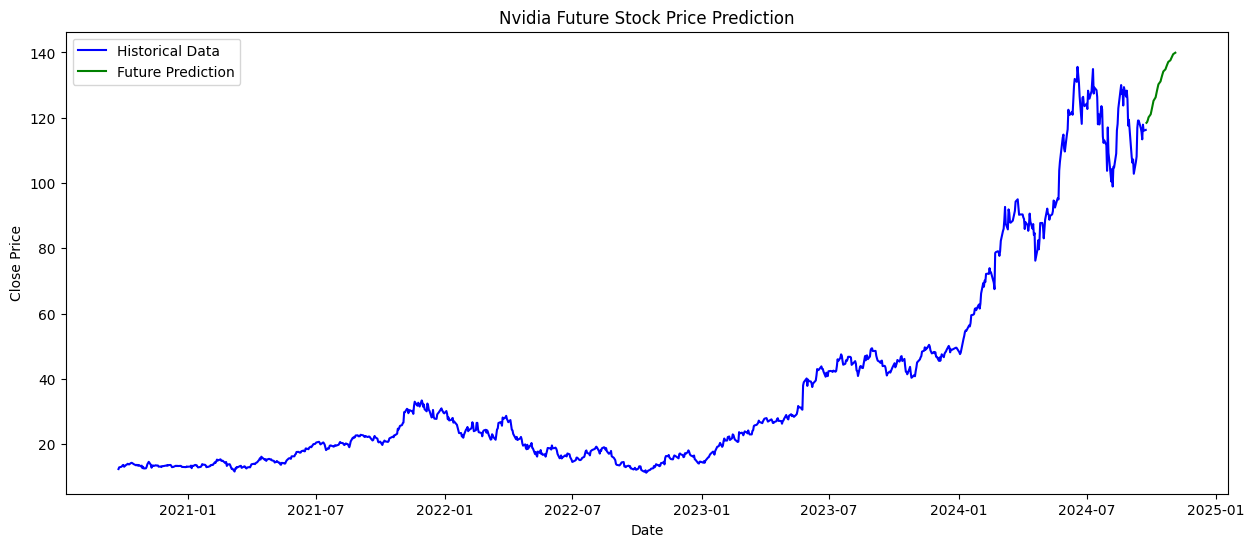

In [24]:
# 마지막 LOOKBACK 기간의 데이터를 사용하여 미래 예측
future_predictions = []
current_input = test_data[-LOOKBACK:].reshape(1, LOOKBACK, 1)  # 마지막 LOOKBACK 데이터
days_to_predict = 30  # 예측할 미래 일수
# 현재 입력 데이터를 기반으로 미래 예측
# 예측값을 future_predictions에 추가
    # 슬라이딩 윈도우로 다음 입력 시퀀스를 만들기
    # current_input에서 두 번째 차원(1:, :)을 사용하고, 새 예측값을 추가
for _ in range(days_to_predict):
    next_pred = model.predict(current_input)
    future_predictions.append(next_pred[0][0])
    next_pred_reshaped = next_pred.reshape((1, 1, 1))
    current_input = np.append(current_input[:, 1:, :], next_pred_reshaped, axis=1)
 # next_pred의 차원을 맞추기 (1, 1, 1)
# 미래 예측 값을 역스케일링
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 미래 예측 날짜를 생성
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=days_to_predict + 1, freq='B')[1:]  # 'B'는 영업일

# 미래 예측을 시각화
plt.figure(figsize=(15, 6))
plt.title('Nvidia Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 기존 데이터와 미래 예측을 그래프로 표시
plt.plot(data['Close'], label='Historical Data', color='blue')
plt.plot(future_dates, future_predictions, label='Future Prediction', color='green')

plt.legend()
plt.show()
